In [1]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

random_rho0s: setting seed=38339


In [2]:
H = create_hamiltonian(system), 0.1

In [3]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

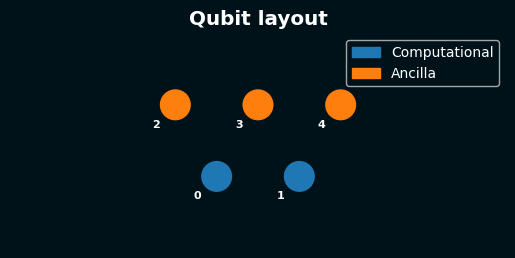

In [4]:
qubits.show_layout()

In [5]:
theta_opt = np.load("losses_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=200, n_grad=10, theta_init=theta_opt)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=28317


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


-----
        Grad calculation time: 
        164.08201575279236 
        Armijo calculation time: 
        14.278794288635254 
        Total grad descend time: 
        2:58.36


In [7]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [8]:
theta_opt

array([-0.25976202,  0.05745914,  0.1       ,  0.1       ,  0.1       ,
        0.07067527,  0.13963151,  0.10355278,  0.32375304,  0.1063698 ,
       -0.30377478, -0.04869559,  0.09982549,  0.1013363 ,  0.10079565,
       -0.11011563,  0.10407656,  0.0782688 ,  0.10065124,  0.10305038,
        0.10022625,  0.0439228 ,  0.25039551,  0.09199031,  0.15998592,
        0.09584107,  0.12488919,  0.29770657,  0.10066985,  0.10756805,
        0.09632241,  0.03911353,  0.08273859, -0.09285639,  0.08900036,
        0.0763917 ,  0.10101812,  0.04914324, -0.50241925,  0.08297476,
        0.09370934,  0.09908302, -0.06932545, -0.0748621 ,  0.10428854,
        0.10788074,  0.09715162,  0.12315637, -0.05098678, -0.10625715,
        0.10266345,  0.10675962,  0.10195221,  0.10854979,  0.16096242,
        0.08689663,  0.63667189,  0.13992008,  0.13229725,  0.04239802,
        0.09856096,  0.09968204,  0.10216016,  0.33179381,  0.13155453,
       -0.23827967,  0.10063055,  0.12698521,  0.10208645,  0.09

rho_rand_haar: seed=43161


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

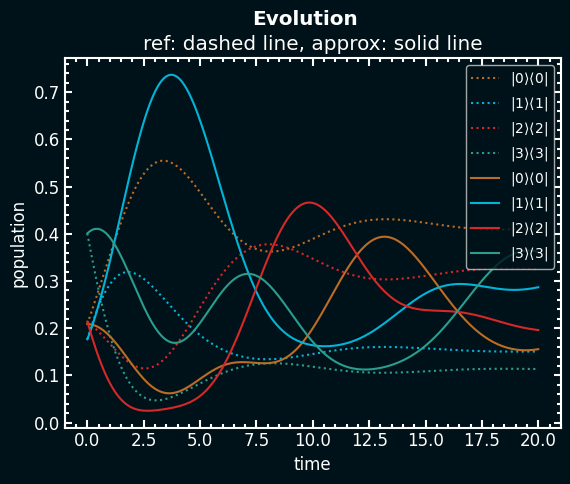

In [9]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(200, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=200, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

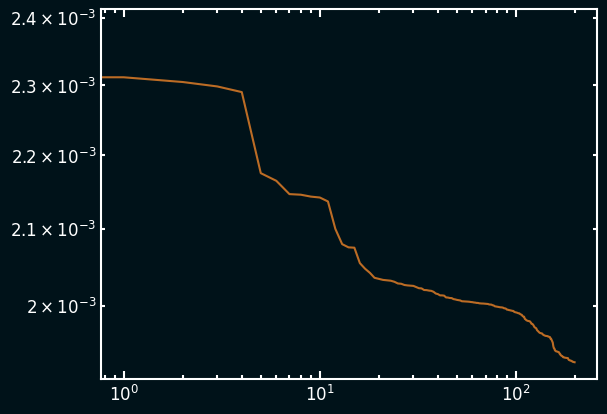

In [10]:
plt.loglog(errors)